# 2010 Baja CA EQ, QTM Catalog Mapping: Density Grid Test Points, β-statistic, 30 days AFTER
Updated 4/6 for Magnitude of Completeness: M > 0.3


In [61]:
# IMPORT CELL; updated 2/11/21

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import obspy
from obspy.core import UTCDateTime
from obspy import read

import obspy.geodetics as gd # Imported whole file
#from obspy.geodetics import locations2degrees # calc_dist() alike?
#from obspy.taup.taup_geo import calc_dist # calc_dist()

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported! ")

Imported! 


In [62]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range = QTM_Range.loc[QTM_Range["MAGNITUDE"]>= 0.3]

Wall time: 2.13 s


In [63]:
# Set mean latitudes and longitudes
MeanLat = QTM_Range["LATITUDE"].mean()
MeanLon = QTM_Range["LONGITUDE"].mean() 

# Define two more datasets of 30 days before and 30 days after Baja EQ
QTM_TEMP = QTM_Range.loc[QTM_Range["EVENTID"] == ""] # Get Baja EQ
QTM_TEMP = QTM_TEMP.iloc[0]
BajaTimestamp = float(QTM_TEMP["TIMESTAMP"])
BajaTimestamp

1270420842.0

In [64]:
QTM_Range_BEFORE = QTM_Range.loc[QTM_Range["TIMESTAMP"] <= BajaTimestamp]
QTM_Range_AFTER = QTM_Range.loc[QTM_Range["TIMESTAMP"] >= BajaTimestamp]

QTM_Range_BEFORE.describe()
QTM_Range_AFTER

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356879,2010,4,4,22,40,42.00,,32.28600,-115.29500,10.000,...,,,,,2010-04-04T22:40:42.000000Z,1.270421e+09,2010-04-04T22:40:42.000000Z,1.270421e+09,0.0,0.0
356880,2010,4,4,22,40,42.16,14607652,32.27350,-115.29400,13.990,...,14607652,1.0,0.01,0,2010-04-04T22:40:42.160000Z,1.270421e+09,2010-04-04T22:40:42.159999Z,1.270421e+09,0.0,0.0
356881,2010,4,4,22,41,45.87,347184,34.43929,-116.93557,-0.583,...,9807541,0.264,0.026,0,2010-04-04T22:41:45.870000Z,1.270421e+09,2010-04-04T22:41:45.869999Z,1.270421e+09,0.0,0.0
356882,2010,4,4,22,41,54.35,347185,33.16622,-115.59365,4.499,...,10531677,0.163,0.017,0,2010-04-04T22:41:54.350000Z,1.270421e+09,2010-04-04T22:41:54.350000Z,1.270421e+09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479971,2010,5,4,22,34,3.79,465025,32.71402,-116.02005,9.038,...,37045436,0.222,0.021,0,2010-05-04T22:34:03.790000Z,1.273012e+09,2010-05-04T22:34:03.790000Z,1.273012e+09,30.0,720.0
479972,2010,5,4,22,34,42.33,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.29,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.62,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0


In [65]:
QTM_Range["LONGITUDE"].values[0]
len(QTM_Range)
QTM_Range["LONGITUDE"].values

Faults = pd.read_csv("cafaults.xy", sep = "[\s]", names = ["LONGITUDE", "LATITUDE"])
# Read in fault traces
Faults
#Faults.describe()
#print(Faults.LATITUDE)
#Faults["LONGITUDE"].astype(float)
#Faults = Faults.loc[Faults["LONGITUDE"] == float]
#Faults.columns = ["LONGITUDE", "LATITUDE"]
#Faults
#Faults.LONGITUDE.astype(float)

FaultsIndices = list(Faults.loc[Faults["LONGITUDE"] == ">"].index)
#FaultsIndices

## Density Grid: First Gridpoint - Point1

(32.7, -115.8)

In [66]:
GridPoints = pd.read_csv("Maps/Density Grid/GridPoints.csv")

In [67]:
# Create first point for analysis

Point1 = GridPoints.loc[(GridPoints["LATITUDE"] >= 32.7) & (GridPoints["LONGITUDE"] >= -115.8)]
#Point1 = Point1.loc[Point1["LONGITUDE"] == -115.8]
Point1 = Point1.iloc[0]
Point1 # 32.7, -115.8

Unnamed: 0    742.0
LATITUDE       32.7
LONGITUDE    -115.8
Name: 742, dtype: float64

In [68]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists1_Deg = gd.locations2degrees(Point1.LATITUDE, Point1.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point1
Dists1_KM = gd.degrees2kilometers(Dists1_Deg)
# Converted all distances to kilometers
Dists1_KM


array([ 138.21121549,  105.69664657,  122.17954372, ...,   74.94107375,
          4.57994691,    9.32164714])

## Density Grid: Second Point - Point2
Along fault line<br>(32.6585, -115.8862)

In [69]:
# Create second point for analysis: fault line

Point2 = pd.DataFrame({"LATITUDE" : [32.6585], "LONGITUDE" : [-115.8862]})
#Point2["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point2

,LATITUDE,LONGITUDE
0,32.6585,-115.8862


In [70]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists2_Deg = gd.locations2degrees(Point2.LATITUDE, Point2.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point2
Dists2_KM = gd.degrees2kilometers(Dists2_Deg)
# Converted all distances to kilometers
Dists2_KM

array([ 140.77905394,  106.45094779,  121.33926817, ...,   77.55484121,
          8.9222135 ,   16.29985863])

### Density Grid: Third Point - Point3
Along fault line<br>(33.5059, -116.4916)

In [71]:
# Create third point for analysis: fault line

Point3 = pd.DataFrame({"LATITUDE" : [33.5059], "LONGITUDE" : [-116.4916]})
#Point2["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point3

,LATITUDE,LONGITUDE
0,33.5059,-116.4916


In [72]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists3_Deg = gd.locations2degrees(Point3.LATITUDE, Point3.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point3
Dists3_KM = gd.degrees2kilometers(Dists3_Deg)
# Converted all distances to kilometers
Dists3_KM

array([  51.09038005,   15.64109087,   12.24389076, ...,  184.95501046,
        114.53718859,  118.78201122])

## Density Grid: Fourth Point - Point4
Salton Sea Geothermal Field<br>(33.163333, -115.616667)

In [73]:
# Create fourth point for analysis: Salton Sea Geothermal Field

Point4 = pd.DataFrame({"LATITUDE" : [33.163333], "LONGITUDE" : [-115.616667]})
#Point3["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point4

,LATITUDE,LONGITUDE
0,33.163333,-115.616667


In [74]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists4_Deg = gd.locations2degrees(Point4.LATITUDE, Point4.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point3
Dists4_KM = gd.degrees2kilometers(Dists4_Deg)
# Converted all distances to kilometers
Dists4_KM

array([  97.92775347,   78.3275777 ,  101.72205307, ...,  111.82848654,
         58.33360844,   56.60893844])

In [75]:
# Plot density points

Points = pd.DataFrame(Point1).T
Points = Points.drop(labels = "Unnamed: 0", axis = 1)
Points
Points = pd.concat([Points, Point2, Point3, Point4])
#type(Point1)
# Points = Point1, Point2, Point3, Point4
Points

,LATITUDE,LONGITUDE
742,32.700000,-115.800000
0,32.658500,-115.886200
0,33.505900,-116.491600
0,33.163333,-115.616667


In [76]:
Point5 = pd.DataFrame({"LATITUDE" : [32.5], "LONGITUDE" : [-116.5]})
Dists5_Deg = gd.locations2degrees(Point5.LATITUDE, Point5.LONGITUDE,
                                 QTM_Range.LATITUDE, QTM_Range.LONGITUDE)

## β-statistic (3/4)
All points

In [77]:
# Redefine all points; distances counts: 0.1deg 
Point1 = pd.DataFrame({"LATITUDE" : [32.7], "LONGITUDE" : [-115.8]})
Point1Data = QTM_Range.copy(deep = True)
Point1Data["DEGDIST"] = Dists1_Deg
Point1Data_Deg = Point1Data.loc[Point1Data["DEGDIST"] <= 0.1]

Point2Data = QTM_Range.copy(deep = True)
Point2Data["DEGDIST"] = Dists2_Deg
Point2Data_Deg = Point2Data.loc[Point2Data["DEGDIST"] <= 0.1]

Point3Data = QTM_Range.copy(deep = True)
Point3Data["DEGDIST"] = Dists3_Deg
Point3Data_Deg = Point3Data.loc[Point3Data["DEGDIST"] <= 0.1]

Point4Data = QTM_Range.copy(deep = True)
Point4Data["DEGDIST"] = Dists4_Deg
Point4Data_Deg = Point4Data.loc[Point4Data["DEGDIST"] <= 0.1]

#4/2/21
Point5Data = QTM_Range.copy(deep = True)
Point5Data["DEGDIST"] = Dists5_Deg
Point5Data_Deg = Point5Data.loc[Point5Data["DEGDIST"] <= 0.1]

In [78]:
Point2Data_Deg.describe()
#QTM_Range.LATITUDE.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,LATITUDE,LONGITUDE,DEPTH,MAGNITUDE,TIMESTAMP,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR,DEGDIST
count,21670.0,21670.000000,21670.000000,21670.000000,21670.000000,21670.000000,21670.000000,21670.000000,21670.000000,21670.000000,2.167000e+04,2.167000e+04,21670.000000,21670.000000,21670.000000
mean,2010.0,4.053207,14.494832,11.033410,29.449377,29.826045,32.678804,-115.830998,6.751726,0.951475,1.271425e+09,1.271425e+09,11.617397,278.848177,0.068020
std,0.0,0.257219,7.556714,6.760623,17.330752,17.322132,0.026843,0.050366,3.176285,0.562829,7.269006e+05,7.269006e+05,8.429769,201.916292,0.021522
min,2010.0,3.000000,1.000000,0.000000,0.000000,0.003000,32.564340,-115.994970,-0.550000,0.300000,1.267837e+09,1.267837e+09,-30.000000,-718.000000,0.004008
25%,2010.0,4.000000,9.000000,5.000000,14.000000,14.616250,32.666950,-115.853620,4.779000,0.520000,1.270835e+09,1.270835e+09,5.000000,115.000000,0.050831
50%,2010.0,4.000000,13.000000,11.000000,29.000000,29.710000,32.678060,-115.820420,6.622000,0.800000,1.271298e+09,1.271298e+09,10.000000,244.000000,0.070834
75%,2010.0,4.000000,20.000000,17.000000,44.000000,44.790000,32.695890,-115.787960,8.430000,1.230000,1.271979e+09,1.271979e+09,18.000000,433.000000,0.087469
max,2010.0,5.000000,31.000000,23.000000,59.000000,59.990000,32.758000,-115.767540,28.090000,4.960000,1.273013e+09,1.273013e+09,30.000000,720.000000,0.099998


In [79]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(QTM_Range)
for i in TimeframeSeq:
    QTM_Temp = QTM_Range_AFTER.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    BetasDF = BetasDF.append(DFTemp)

In [80]:
# TEST CELL
QTM_Range_AFTER.describe()
#BetasDF = pd.DataFrame(columns = ["a", "b"])
NaTest = len(QTM_Range_AFTER.loc[QTM_Range_AFTER["TIMESTAMP"]<=BajaTimestamp+24*30*60*60])
LambdaTest = Nb*24*30/(24*60)
BetaTest = (NaTest - LambdaTest)/np.sqrt(LambdaTest)
BetaTest
DFTempTest = pd.DataFrame(data = [[BetaTest, 24*30]], columns = ["BetaStat", "Timeframe (hours after)"]) # Need double brackets for dimensions
DFTempTest
BetasDF.append(DFTempTest, ignore_index = True, sort = True)

,BetaStat,Timeframe (hours after)
0,30.051375,2
1,48.088567,12
2,61.290971,24
3,196.111618,168
4,193.283119,240
5,179.364929,480
6,150.389417,720
7,150.389417,720


### β = (Na - Λ)/√Λ
### Λ = Nb * Δta/Δtb
beta = Na - lambda/sqrt(lambda)

lambda = Nb * delta time,a / delta time,b

Na = number of events during time period of interest delta time,a

Nb = total reference number of events during total reference time period delta time,b

#### Point 1

In [81]:
len(Point1Data_Deg)

33071

In [82]:
%%time
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point1BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point1Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point1Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point1BetasDF = Point1BetasDF.append(DFTemp)
    print(Nb, NaTemp)
Point1BetasDF

33071 58
33071 330
33071 809
33071 13644
33071 17487
33071 27087
33071 32860
Wall time: 502 ms


,BetaStat,Timeframe (hours after)
0,1.780655,2
0,3.277422,12
0,10.981532,24
0,157.541719,168
0,161.299688,240
0,152.993379,480
0,126.949567,720


In [83]:
# TEST CELL
i = 24*30
TEST_DF = pd.DataFrame()
QTM_Temp = Point1Data_Deg.copy(deep = True)
QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
NaTemp = len(QTM_Temp)
LambdaTemp = Nb*i/(24*60)
BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
TEST_DF = TEST_DF.append(DFTemp)
TEST_DF

,BetaStat,Timeframe (hours after)
0,126.949567,720


#### Point 2

In [84]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point2BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point2Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point2Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point2BetasDF = Point2BetasDF.append(DFTemp)
Point2BetasDF

,BetaStat,Timeframe (hours after)
0,-3.845582,2
0,-0.936390,12
0,6.726518,24
0,111.271592,168
0,115.535164,240
0,117.174300,480
0,102.352448,720


#### Point 3

In [85]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point3BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point3Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point3Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point3BetasDF = Point3BetasDF.append(DFTemp)
Point3BetasDF

,BetaStat,Timeframe (hours after)
0,2.300379,2
0,34.497300,12
0,45.817983,24
0,40.928931,168
0,36.288301,240
0,25.804908,480
0,19.663849,720


#### Point 4

In [86]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point4BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point4Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point4Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point4BetasDF = Point4BetasDF.append(DFTemp)
Point4BetasDF

,BetaStat,Timeframe (hours after)
0,52.794056,2
0,53.263318,12
0,52.975938,24
0,31.840609,168
0,25.141577,240
0,16.085897,480
0,10.647531,720


#### Point 5
#### 4/2/21

In [87]:
# Calculate β-statistics in sequence of timeframes: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d
TimeframeSeq = [2,12,24,24*7,24*10,24*20,24*30]
TimeframeSeq
Point5BetasDF = pd.DataFrame(columns = ["BetaStat", "Timeframe (hours after)"])
Nb = len(Point5Data_Deg)
for i in TimeframeSeq:
    QTM_Temp = Point5Data_Deg.copy(deep = True)
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] >= BajaTimestamp]
    QTM_Temp = QTM_Temp.loc[QTM_Temp["TIMESTAMP"] < BajaTimestamp + i*60*60] # hours*minutes*seconds
    NaTemp = len(QTM_Temp)
    LambdaTemp = Nb*i/(24*60)
    BetaTemp = (NaTemp - LambdaTemp)/np.sqrt(LambdaTemp)
    DFTemp = pd.DataFrame(data = [[BetaTemp, i]], columns = ["BetaStat", "Timeframe (hours after)"])
    Point5BetasDF = Point5BetasDF.append(DFTemp)
Point5BetasDF

,BetaStat,Timeframe (hours after)
0,26.795548,2
0,10.863164,12
0,7.616867,24
0,2.586135,168
0,2.041241,240
0,1.154701,480
0,0.707107,720


## Plotting β-statistics

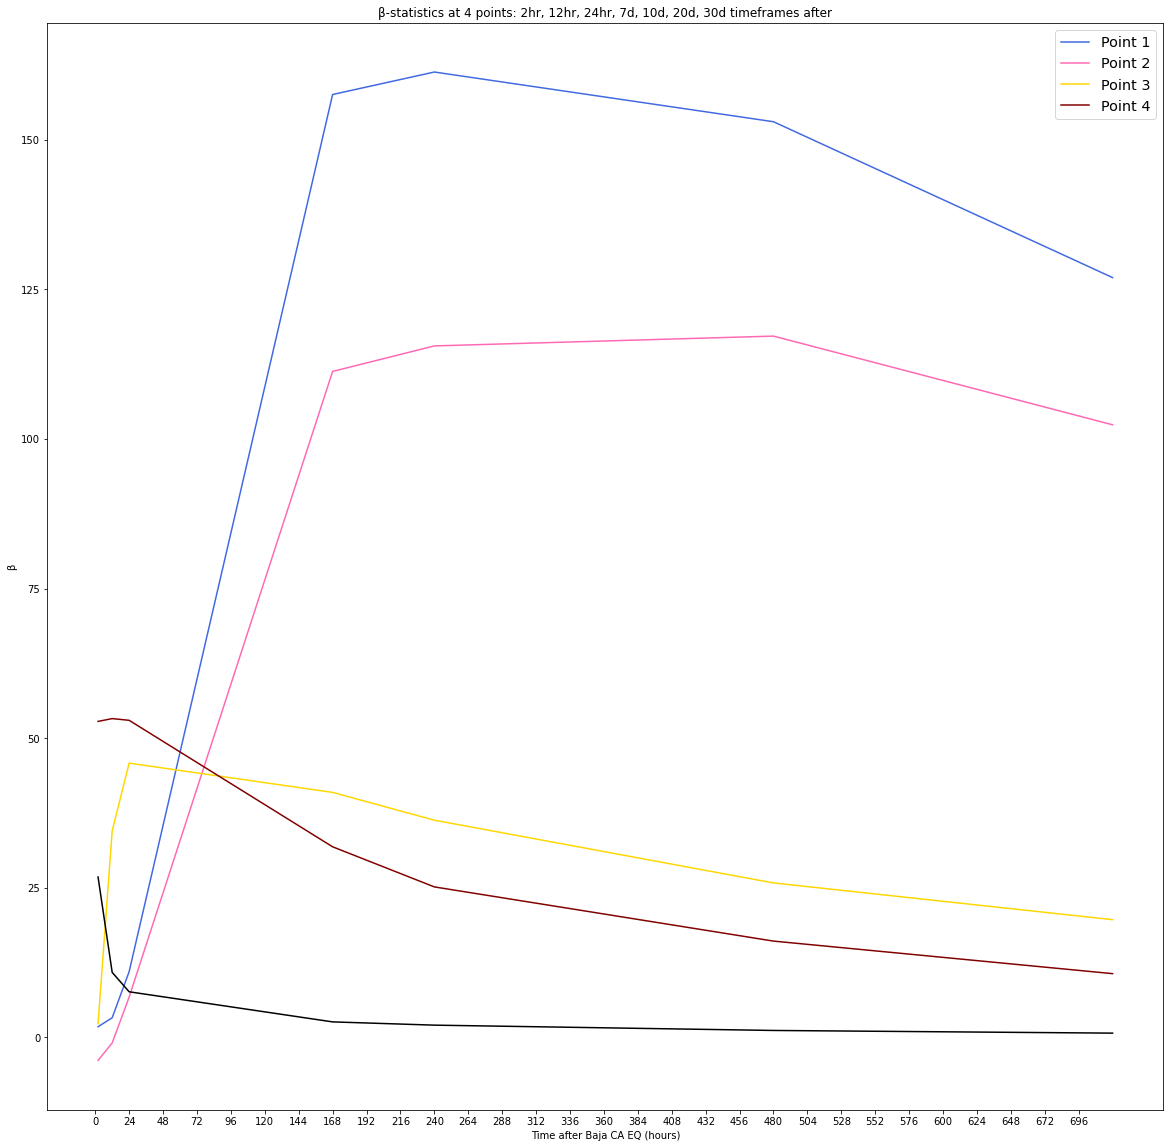

In [88]:
# Plot all timeframe βs AND cumulative seismicities

plt.figure(figsize=(20,20))

plt.plot(Point1BetasDF["Timeframe (hours after)"], Point1BetasDF.BetaStat, c = "royalblue");
plt.plot(Point2BetasDF["Timeframe (hours after)"], Point2BetasDF.BetaStat, c = "hotpink");
plt.plot(Point3BetasDF["Timeframe (hours after)"], Point3BetasDF.BetaStat, c = "gold");
plt.plot(Point4BetasDF["Timeframe (hours after)"], Point4BetasDF.BetaStat, c = "maroon");
plt.plot(Point5BetasDF["Timeframe (hours after)"], Point5BetasDF.BetaStat, c = "black");

plt.xlabel("Time after Baja CA EQ (hours)");
plt.ylabel("β");
plt.title("β-statistics at 4 points: 2hr, 12hr, 24hr, 7d, 10d, 20d, 30d timeframes after");
plt.xticks(np.arange(0, 720, 24));
plt.legend(["Point 1", "Point 2", "Point 3", "Point 4"], fontsize = "x-large");

plt.savefig("Maps/Density Grid/β-statistics/ALLPoints_β_AFTER_MoC_1", facecolor = "white");